### $\tau$ filter

This notebook investigates the tau filter used in the SAFE model, in various forms.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

### Standard implementation

The filter used in the SAFE model is an exponential decay filter, or exponential smoothing filter ([wiki](https://en.wikipedia.org/wiki/Exponential_smoothing)).

Which is implemented as:

$
y_0 = x_0
\\\\
y_i = \alpha x_i + (1 - \alpha)y_{i-1}
$

where $\alpha = \frac{dt}{\tau + dt}$

This is the standard way of writing the filter, and allows linear processing time.  Later in the notebook the convolutional form and matrix form will be described.

In [24]:
def tau_filter(x, tau, dt):
    alpha = dt / (tau + dt)
    y = np.zeros(x.shape)
    y[0] = alpha * x[0]
    for i in range(1,x.size):
        y[i] = alpha * x[i] + (1-alpha) * y[i-1]
    return y

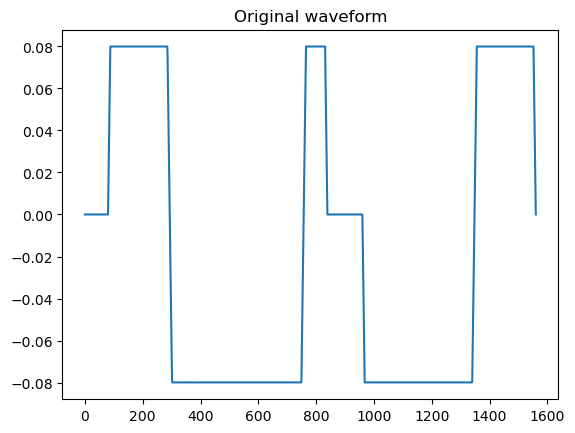

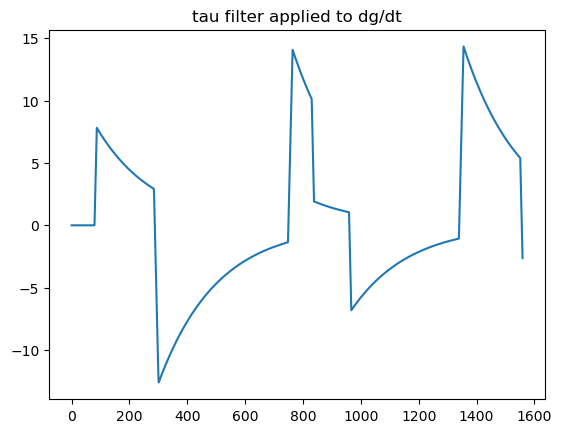

In [16]:
npz = np.load('waveforms/diff_pns.npz')
g = npz['g']
dt = npz['dt']

plt.figure()
plt.plot(g)
plt.title('Original waveform')
plt.show()

dgdt = np.diff(g)/dt

tau = 10e-3
tau_dgdt = tau_filter(dgdt, tau, dt)
plt.figure()
plt.plot(tau_dgdt)
plt.title('tau filter applied to dg/dt')
plt.show()

### As convolution

To better understand the operation, we can view it as a convolution with the function:
$
f_i = \alpha*(1-\alpha)^i
$


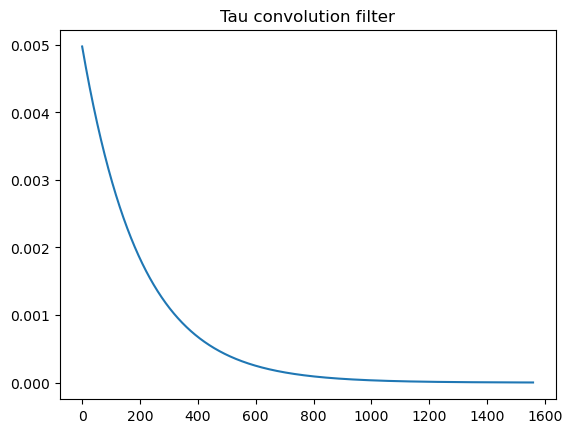

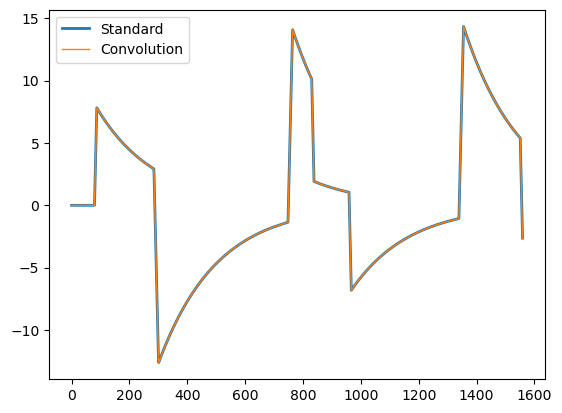

In [23]:
alpha = dt / (tau + dt)
filter =  alpha * np.power(1 - alpha, np.arange(dgdt.size))

plt.figure()
plt.plot(filter)
plt.title('Tau convolution filter')
plt.show()

plt.figure()
plt.plot(tau_dgdt, label='Standard', lw=2)
plt.plot(np.convolve(dgdt, filter, mode='full')[:dgdt.size], label='Convolution', lw=1)
plt.legend()
plt.show()

### As a matrix

Here we just represent the convoltion in matrix form

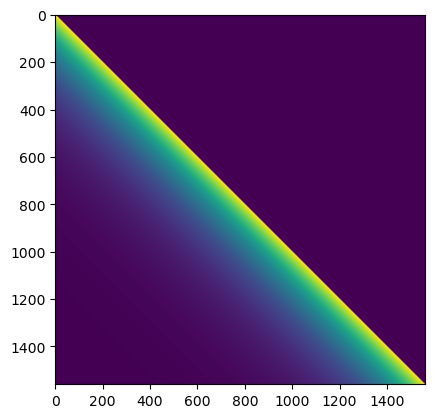

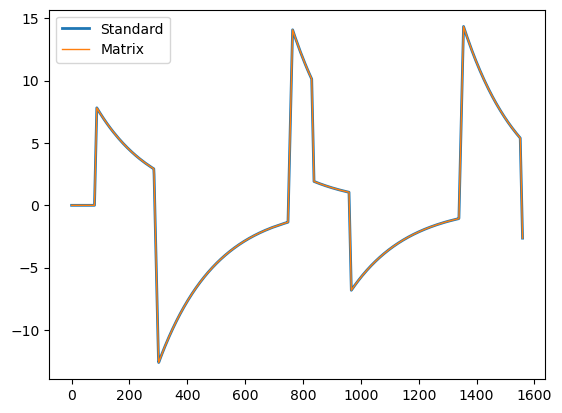

In [31]:
T = np.zeros([dgdt.size, dgdt.size])
for i in range(dgdt.size):
    row = np.power(1 - alpha, np.arange(i+1)) * alpha
    T[i,:i+1] = row[::-1]
    
plt.figure()
plt.imshow(T)
plt.show()

plt.figure()
plt.plot(tau_dgdt, label='Standard', lw=2)
plt.plot(T@dgdt, label='Matrix', lw=1)
plt.legend()
plt.show()